# Desbalanceamento

***

<img src="../imagens/desbalaceamento.jpg" alt="Meme" width="400" />

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Classes do modelo
from sklearn.linear_model import LogisticRegression

# Funções de avaliação dos modelos
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold


import warnings
warnings.filterwarnings('ignore')

## Análise do conjunto de dados

Abalone -  O Abalone é um molusco gastrópode, herbívoro, que se alimenta de algas marinhas durante aproximadamente 48 meses.

Preveja a idade do abalone a partir de medições físicas. 

https://archive.ics.uci.edu/dataset/1/abalone



In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/johnattandouglas/monitoria-ml/main/Datasets/abalone.csv")

In [3]:
df.head()

# Target - Rings

,Rings,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight
0,15,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,7,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,9,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,10,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,7,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


### Visualizando a distribuição dos dados por classe

<Axes: xlabel='Rings', ylabel='count'>

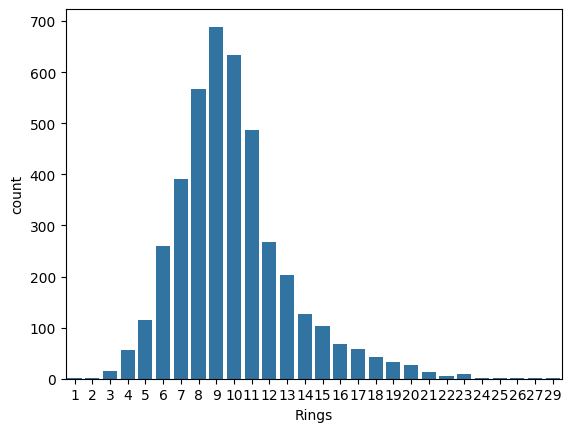

In [4]:
#percentual 
#sns.barplot(x="Rings", y="Rings",  data=df,  estimator=lambda x: len(x) / len(df) * 100)

# Se quiser visualizar a contagem 
sns.countplot(x="Rings", data=df)
# plt.show()

### Separando o conjunto de dados

(3727, 9)


<Axes: xlabel='Rings', ylabel='Rings'>

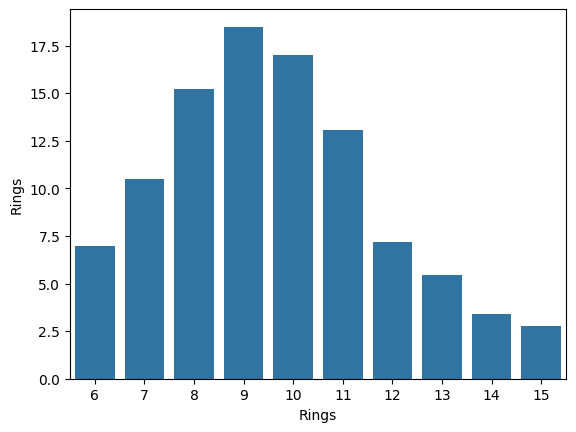

In [5]:
dataset = df.loc[(df["Rings"]>5) & (df["Rings"]<16)]

print(dataset.shape)

#percentual 
sns.barplot(x="Rings", y="Rings",  data=dataset,  estimator=lambda x: len(x) / len(dataset) * 100)

In [6]:
X = dataset.iloc[:,1:8]
y = dataset.iloc[:,0]

#Separando o conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

## Treinando o modelo

In [7]:
model = LogisticRegression()

#treinando o modelo
model.fit(X_train, y_train)

#predição
y_pred = model.predict(X_test)

#Resultados do classificador
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           6       0.46      0.51      0.48        78
           7       0.29      0.27      0.28       117
           8       0.27      0.31      0.29       171
           9       0.24      0.36      0.29       207
          10       0.25      0.39      0.30       190
          11       0.30      0.21      0.24       146
          12       0.00      0.00      0.00        80
          13       0.00      0.00      0.00        61
          14       0.00      0.00      0.00        38
          15       0.00      0.00      0.00        31

    accuracy                           0.27      1119
   macro avg       0.18      0.21      0.19      1119
weighted avg       0.23      0.27      0.24      1119



## SMOTE

In [8]:
#!pip install imblearn

In [9]:
from imblearn.over_sampling import SMOTE

ModuleNotFoundError: No module named 'imblearn'

In [ ]:
smt = SMOTE(random_state=20)
X_smt, y_smt = smt.fit_resample(X_train, y_train)


print('Resampled dataset shape \n')
print(y_smt.value_counts())

Resampled dataset shape 

11    482
14    482
9     482
15    482
10    482
8     482
13    482
7     482
6     482
12    482
Name: Rings, dtype: int64


In [ ]:
model = LogisticRegression(random_state=20)

#treinando o modelo
model.fit(X_smt, y_smt)

#predição
y_pred = model.predict(X_test)

#Resultados do classificador
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           6       0.39      0.64      0.49        78
           7       0.21      0.30      0.24       117
           8       0.24      0.29      0.26       171
           9       0.28      0.20      0.23       207
          10       0.33      0.13      0.19       190
          11       0.26      0.34      0.30       146
          12       0.03      0.01      0.02        80
          13       0.10      0.02      0.03        61
          14       0.09      0.11      0.10        38
          15       0.10      0.39      0.16        31

    accuracy                           0.24      1119
   macro avg       0.20      0.24      0.20      1119
weighted avg       0.24      0.24      0.22      1119



In [ ]:
model = LogisticRegression(random_state=20)

#penalty - depende do algoritmo usado para otimização (solver) padrão: ‘lbfgs’ - [‘l2’, None]
# 'none': nenhuma penalidade é adicionada;
# 'l2': adiciona um termo de penalidade L2 e é a escolha padrão;

skf = StratifiedKFold(5)

parameters = {'penalty': ['L2', 'none']}

grid = GridSearchCV(estimator = model,             
                    param_grid = parameters,     
                    scoring = 'f1_macro',          # métrica de avaliação
                    cv = skf)                        # cross-validation

#treinando o modelo para seleção dos parâmetros
grid.fit(X_smt, y_smt)

y_pred = grid.predict(X_test)

print("Melhor parametro:", grid.best_params_) 

Melhor parametro: {'penalty': 'none'}


In [ ]:
model = LogisticRegression(penalty="none", random_state=20)

#treinando o modelo
model.fit(X_smt, y_smt)

#predição
y_pred = model.predict(X_test)

#Resultados do classificador
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           6       0.41      0.63      0.49        78
           7       0.27      0.28      0.28       117
           8       0.29      0.37      0.32       171
           9       0.30      0.26      0.28       207
          10       0.29      0.13      0.18       190
          11       0.27      0.27      0.27       146
          12       0.12      0.09      0.10        80
          13       0.09      0.05      0.06        61
          14       0.05      0.08      0.06        38
          15       0.13      0.39      0.19        31

    accuracy                           0.26      1119
   macro avg       0.22      0.25      0.22      1119
weighted avg       0.26      0.26      0.25      1119

